[simple autoencoder](https://blog.keras.io/building-autoencoders-in-keras.html)

In [48]:
%matplotlib inline

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# intermediate result
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [54]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [55]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3525 - val_loss: 0.2694
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2611 - val_loss: 0.2489
Epoch 3/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.2382 - val_loss: 0.2254
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2182 - val_loss: 0.2086
Epoch 5/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.2039 - val_loss: 0.1966
Epoch 6/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1937 - val_loss: 0.1880
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1857 - val_loss: 0.1807
Epoch 8/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1791 - val_loss: 0.1746
Epoch 9/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1733 - val_loss: 0.1693
Epoch

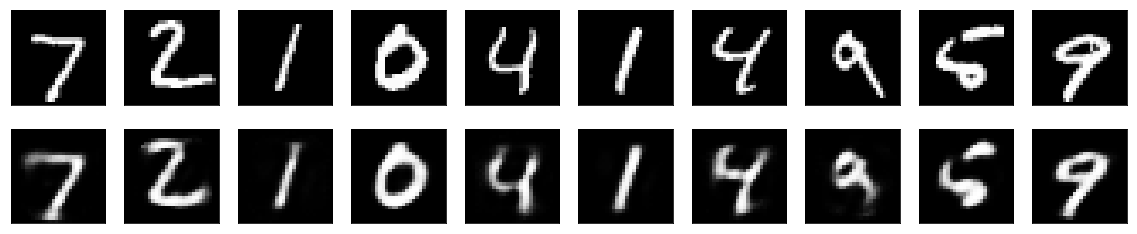

In [56]:
reconst_test = autoencoder.predict(x_test)
encode_test = encoder.predict(x_test)

n = 10
row = 2

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Dimension Reduction

In [29]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [12]:
feat_columns = [c for c in train.columns if c not in ['Team1', 'Team2', 'Match', 'Label']]
target_column = "Label"

In [25]:
train = pd.read_csv("../Kaggle-NCAA/train.csv")
train.fillna(0, inplace=True)

print(train.shape)

(46909, 175)


### Normalise training data

In [16]:
def norm(x):
    x_max = max(x)
    x_min = min(x)
    
    return (x-x_min)/(x_max-x_min)

In [26]:
for f in feat_columns:
    train[f] = norm(train[f])
    
X_train, X_val, y_train, y_val = train_test_split(train[feat_columns], train[target_column], test_size=0.3)

In [27]:
X_train.head()

,Season,Type,WScore_min_x,WScore_mean_x,WScore_max_x,WFGM_min_x,WFGM_mean_x,WFGM_max_x,WFGA_min_x,WFGA_mean_x,...,LStl_min_y,LStl_mean_y,LStl_max_y,LBlk_min_y,LBlk_mean_y,LBlk_max_y,LPF_min_y,LPF_mean_y,LPF_max_y,seed_diff
38149,0.375,0.0,0.540541,0.414480,0.400000,0.545455,0.478631,0.513514,0.409091,0.520766,...,0.333333,0.206182,0.133333,0.0,0.416293,0.3,0.545455,0.677362,0.60,0.5
4125,0.250,0.0,0.486486,0.422183,0.353846,0.636364,0.451066,0.432432,0.545455,0.442308,...,0.666667,0.503736,0.466667,0.0,0.474039,0.5,0.454545,0.619737,0.40,0.5
35140,0.250,0.0,0.621622,0.377561,0.276923,0.818182,0.368302,0.351351,0.500000,0.506804,...,0.333333,0.426262,0.600000,0.0,0.345234,0.5,0.090909,0.523626,0.44,0.5
23546,0.250,0.0,0.432432,0.181802,0.184615,0.363636,0.262438,0.351351,0.500000,0.503300,...,0.000000,0.295175,0.266667,0.0,0.129896,0.0,0.181818,0.322139,0.36,0.5
546,0.875,0.0,0.405405,0.421206,0.292308,0.545455,0.445052,0.324324,0.454545,0.457060,...,0.666667,0.335268,0.266667,0.0,0.255732,0.1,0.363636,0.324756,0.20,0.5


In [57]:
# reduce to 40 features
encoding_dim = 40

input_df = Input(shape=(171,))
encoded = Dense(encoding_dim, activation='relu')(input_df)
decoded = Dense(171, activation='sigmoid')(encoded)

# encoder
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [59]:
autoencoder.fit(X_train, X_train,
                epochs=150,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Train on 32836 samples, validate on 14073 samples
Epoch 1/150
32836/32836 [==============================] - 1s 25us/step - loss: 0.0384 - val_loss: 0.0272
Epoch 2/150
32836/32836 [==============================] - 0s 15us/step - loss: 0.0255 - val_loss: 0.0248
Epoch 3/150
32836/32836 [==============================] - 0s 15us/step - loss: 0.0247 - val_loss: 0.0245
Epoch 4/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0244 - val_loss: 0.0243
Epoch 5/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0242 - val_loss: 0.0241
Epoch 6/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0240 - val_loss: 0.0239
Epoch 7/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0238 - val_loss: 0.0237
Epoch 8/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0235
Epoch 9/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0234 - val_loss: 0.0

32836/32836 [==============================] - 1s 16us/step - loss: 0.0124 - val_loss: 0.0124
Epoch 78/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0124 - val_loss: 0.0123
Epoch 79/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0123 - val_loss: 0.0123
Epoch 80/150
32836/32836 [==============================] - 0s 14us/step - loss: 0.0123 - val_loss: 0.0122
Epoch 81/150
32836/32836 [==============================] - 0s 15us/step - loss: 0.0122 - val_loss: 0.0122
Epoch 82/150
32836/32836 [==============================] - 0s 13us/step - loss: 0.0122 - val_loss: 0.0121
Epoch 83/150
32836/32836 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0121
Epoch 84/150
32836/32836 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0121
Epoch 85/150
32836/32836 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0120
Epoch 86/150
32836/32836 [========================

### Apply prediction on reduced dimensional features

In [46]:
encoded_X_train = encoder.predict(X_train)
encoded_X_val = encoder.predict(X_val)

In [47]:
lgb_train = lgb.Dataset(encoded_X_train, y_train, free_raw_data=False)
lgb_test = lgb.Dataset(encoded_X_val, y_val, reference=lgb_train,  free_raw_data=False)

params = {"objective": "binary",
          "metric": {"binary_logloss"},
          "boosting_type": "gbdt",
          "learning_rate": 0.01,
          "max_depth": 4,
          "num_leaves": 16,
          "min_data_in_leaf": 30,
          "min_child_samples": 10,
          }

print('start training...')

model = lgb.train(params,
                  lgb_train,
                  num_boost_round=200,
                  valid_sets=lgb_test,
                  early_stopping_rounds=50,
                  learning_rates=lambda iter: 0.7 * (0.999 ** iter))

start training...
[1]	valid_0's binary_logloss: 0.650816
Train until valid scores didn't improve in 50 rounds.
[2]	valid_0's binary_logloss: 0.636275
[3]	valid_0's binary_logloss: 0.626666
[4]	valid_0's binary_logloss: 0.61973
[5]	valid_0's binary_logloss: 0.614388
[6]	valid_0's binary_logloss: 0.60939
[7]	valid_0's binary_logloss: 0.6073
[8]	valid_0's binary_logloss: 0.605893
[9]	valid_0's binary_logloss: 0.60457
[10]	valid_0's binary_logloss: 0.601996
[11]	valid_0's binary_logloss: 0.601164
[12]	valid_0's binary_logloss: 0.600583
[13]	valid_0's binary_logloss: 0.60018
[14]	valid_0's binary_logloss: 0.598705
[15]	valid_0's binary_logloss: 0.598032
[16]	valid_0's binary_logloss: 0.598207
[17]	valid_0's binary_logloss: 0.597882
[18]	valid_0's binary_logloss: 0.597881
[19]	valid_0's binary_logloss: 0.598183
[20]	valid_0's binary_logloss: 0.598251
[21]	valid_0's binary_logloss: 0.598061
[22]	valid_0's binary_logloss: 0.598631
[23]	valid_0's binary_logloss: 0.598685
[24]	valid_0's binary_l